In [85]:
import construction as cs
import matplotlib.pyplot as plt

### read font
from matplotlib import font_manager

font_dirs = ['Barlow/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

import networkx as nx
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load generated graphs

In [109]:
def load_origin_graph(file_name,gap=299):
    data_in = cs.load_data("../Datasets/"+file_name+".dat")
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_ETNgen_graph(file_name):
    path = "../Generated_graphs/ETNgen-"+file_name+".dat"
    gap = 299 
    
    data_in = cs.load_data(path)
    graph = cs.build_graphs(data_in,gap=gap)
    return graph


def load_tag_graph(file_name):
    path = "../Competitors_generated_graphs/TagGen/"+file_name+"_generato_TagGen.dat"
    gap = 0 
    data_in = cs.load_data(path)
    graph = cs.build_graphs(data_in,gap=gap)
    return graph

def load_tag_graph_calls_sms(file_name):
    path = "../Competitors_generated_graphs/TagGen/"+file_name+"_599_generato_TagGen.dat"
    gap = 0 
    data_in = cs.load_data(path)
    graph = cs.build_graphs(data_in,gap=gap)
    return graph

In [110]:
import networkx as nx
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from topological_metrics import *

import os

# Compute and store topological distributions

In [135]:
file_name = "FF_calls_1sett"
orig_graphs = load_origin_graph(file_name,gap=599)
etn_gen = load_ETNgen_graph(file_name)
tag_gen = load_tag_graph_calls_sms(file_name)

In [136]:
print(len(orig_graphs),len(etn_gen),len(tag_gen))

1007 993 1007


In [137]:
def comp_metric(graphs,metric):
    metric_dist = []
    for graph in graphs:
        metric_dist.append(metric(graph))
    return metric_dist

def compute_store_metrics(metrics,metrics_names,generator,file_name,graphs):
    for i in range(len(metrics)):
        metric = metrics[i]
        metric_name = metrics_names[i]
        met = comp_metric([graphs],metric)
        np.save("topology_results/SI/"+generator+"/"+file_name+"/"+metric_name,met)
        
def compute_store_metrics_original(metrics,metrics_names,file_name,graphs):
    for i in range(len(metrics)):
        metric = metrics[i]
        metric_name = metrics_names[i]
        met = comp_metric([graphs],metric)
        np.save("topology_results/original_distributions/"+file_name+"/"+metric_name,met)
        

In [138]:
metrics = [density,global_clustering,average_shortest_path,dist_number_of_individuals,
           dist_number_of_new_conversations,get_ass,s_metric,dist_frequency_of_interactions,
           dist_strength_of_nodes,dist_duration]
metrics_names = ["density","clust","asp","nb_interactions",
                   "new_con","ass","s_metric","interacting_indiv",
                   "streng","dur"]

In [139]:
compute_store_metrics_original(metrics,metrics_names,file_name,orig_graphs)

In [140]:
compute_store_metrics(metrics,metrics_names,
                      "etngen",
                      file_name,
                      etn_gen)

In [141]:
compute_store_metrics(metrics,metrics_names,
                      "taggen",
                      file_name,
                      tag_gen)

# load distributions

In [143]:
def load_topo_distributions(generator,file_name):
    
    den = np.load("topology_results/SI/"+generator+"/"+file_name+"/density.npy",allow_pickle=True)
    clust = np.load("topology_results/SI/"+generator+"/"+file_name+"/clust.npy",allow_pickle=True)
    asp = np.load("topology_results/SI/"+generator+"/"+file_name+"/asp.npy",allow_pickle=True)
    nb_inter = np.load("topology_results/SI/"+generator+"/"+file_name+"/nb_interactions.npy",allow_pickle=True)
    new_conv = np.load("topology_results/SI/"+generator+"/"+file_name+"/new_con.npy",allow_pickle=True)
    ass = np.load("topology_results/SI/"+generator+"/"+file_name+"/ass.npy",allow_pickle=True)
    s_met = np.load("topology_results/SI/"+generator+"/"+file_name+"/s_metric.npy",allow_pickle=True)
    inter_indiv = np.load("topology_results/SI/"+generator+"/"+file_name+"/interacting_indiv.npy",allow_pickle=True)
    stren = np.load("topology_results/SI/"+generator+"/"+file_name+"/streng.npy",allow_pickle=True)
    durat = np.load("topology_results/SI/"+generator+"/"+file_name+"/dur.npy",allow_pickle=True)
    
    return asp,ass,clust,stren,durat,s_met,new_conv,inter_indiv,den,nb_inter


In [144]:

def load_topo_original(file_name):
    den = np.load("topology_results/original_distributions/"+file_name+"/density.npy",allow_pickle=True)
    clust = np.load("topology_results/original_distributions/"+file_name+"/clust.npy",allow_pickle=True)
    asp = np.load("topology_results/original_distributions/"+file_name+"/asp.npy",allow_pickle=True)
    nb_inter = np.load("topology_results/original_distributions/"+file_name+"/nb_interactions.npy",allow_pickle=True)
    new_conv = np.load("topology_results/original_distributions/"+file_name+"/new_con.npy",allow_pickle=True)
    ass = np.load("topology_results/original_distributions/"+file_name+"/ass.npy",allow_pickle=True)
    s_met = np.load("topology_results/original_distributions/"+file_name+"/s_metric.npy",allow_pickle=True)
    inter_indiv = np.load("topology_results/original_distributions/"+file_name+"/interacting_indiv.npy",allow_pickle=True)
    stren = np.load("topology_results/original_distributions/"+file_name+"/streng.npy",allow_pickle=True)
    durat = np.load("topology_results/original_distributions/"+file_name+"/dur.npy",allow_pickle=True)
    
    return asp,ass,clust,stren,durat,s_met,new_conv,inter_indiv,den,nb_inter


In [145]:
def compute_probs(data, n=10): 
    data = np.array(data)
    h, e = np.histogram(data, n)
    p = h/data.shape[0]
    return e, p

def support_intersection(p, q): 
    sup_int = (
        list(
            filter(
                lambda x: (x[0]!=0) & (x[1]!=0), zip(p, q)
            )
        )
    )
    return sup_int

def get_probs(list_of_tuples): 
    p = np.array([p[0] for p in list_of_tuples])
    q = np.array([p[1] for p in list_of_tuples])
    return p, q

def kl_divergence(p, q): 
    return np.sum(p*np.log(p/q))

def js_divergence(p, q):
    m = (1./2.)*(p + q)
    return (1./2.)*kl_divergence(p, m) + (1./2.)*kl_divergence(q, m)

def compute_kl_divergence(train_sample, test_sample, n_bins=10): 
    """
    Computes the KL Divergence using the support 
    intersection between two different samples
    """
    E = 0.0000000001
    e, p = compute_probs(train_sample, n=n_bins)
    _, q = compute_probs(test_sample, n=e)
    
    p = np.array(p) + E 
    q = np.array(q) + E 
    
    p = p/sum(p)
    q = q/sum(q)
    
    list_of_tuples = support_intersection(p, q)
    p, q = get_probs(list_of_tuples)
    
    return kl_divergence(p, q)


In [146]:
def compute_ks_all_metrics(nb_bins,file_name):
    res_etn = []
    res_tag = []
    o_in = load_topo_original(file_name)
    e_in = load_topo_distributions("etngen",file_name)
    t_in = load_topo_distributions("taggen",file_name)

    all_res = []
    for i in range(10):
        
        o = o_in[i][0]
        e = e_in[i]
        t = t_in[i]

        tmp = []
        for i in e:
            kl = compute_kl_divergence(o,i)
            tmp.append(kl)
        #res_etn.append([np.mean(tmp),np.std(tmp)])
        res_etn.append([np.mean(tmp),np.std(tmp)/np.sqrt(len(tmp))])


        tmp = []
        for i in t:
            kl = compute_kl_divergence(o,i)
            tmp.append(kl)
        # standard error
        #res_tag.append([np.mean(tmp),np.std(tmp)])
        res_tag.append([np.mean(tmp),np.std(tmp)/np.sqrt(len(tmp))])

    
    return [np.array(res_etn),np.array(res_tag)]

array(['Average shortest\npath length', 'Assortativity',
       'Global clustering \ncoefficient', 'Edge strength',
       'Duration of contacts', 'S-metric', 'New conversations',
       'Interacting\nindividuals', 'Density', 'Number of interactions'],
      dtype='<U30')

In [147]:


ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal


line_width = 1.5

In [148]:
idx =[2, 5, 1, 8, 9, 6, 4, 3, 0, 7]
tmp= ["Density",
      "Global clustering \ncoefficient",
      "Average shortest\npath length",
      "Interacting\nindividuals",
      "New conversations",
      "Assortativity",
      "S-metric",        
      "Number of interactions",
      "Edge strength",
      "Duration of contacts"]

tmp = np.array(tmp)

In [149]:
labels = tmp[idx]

<ipython-input-77-296b56c245a3>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(labels)


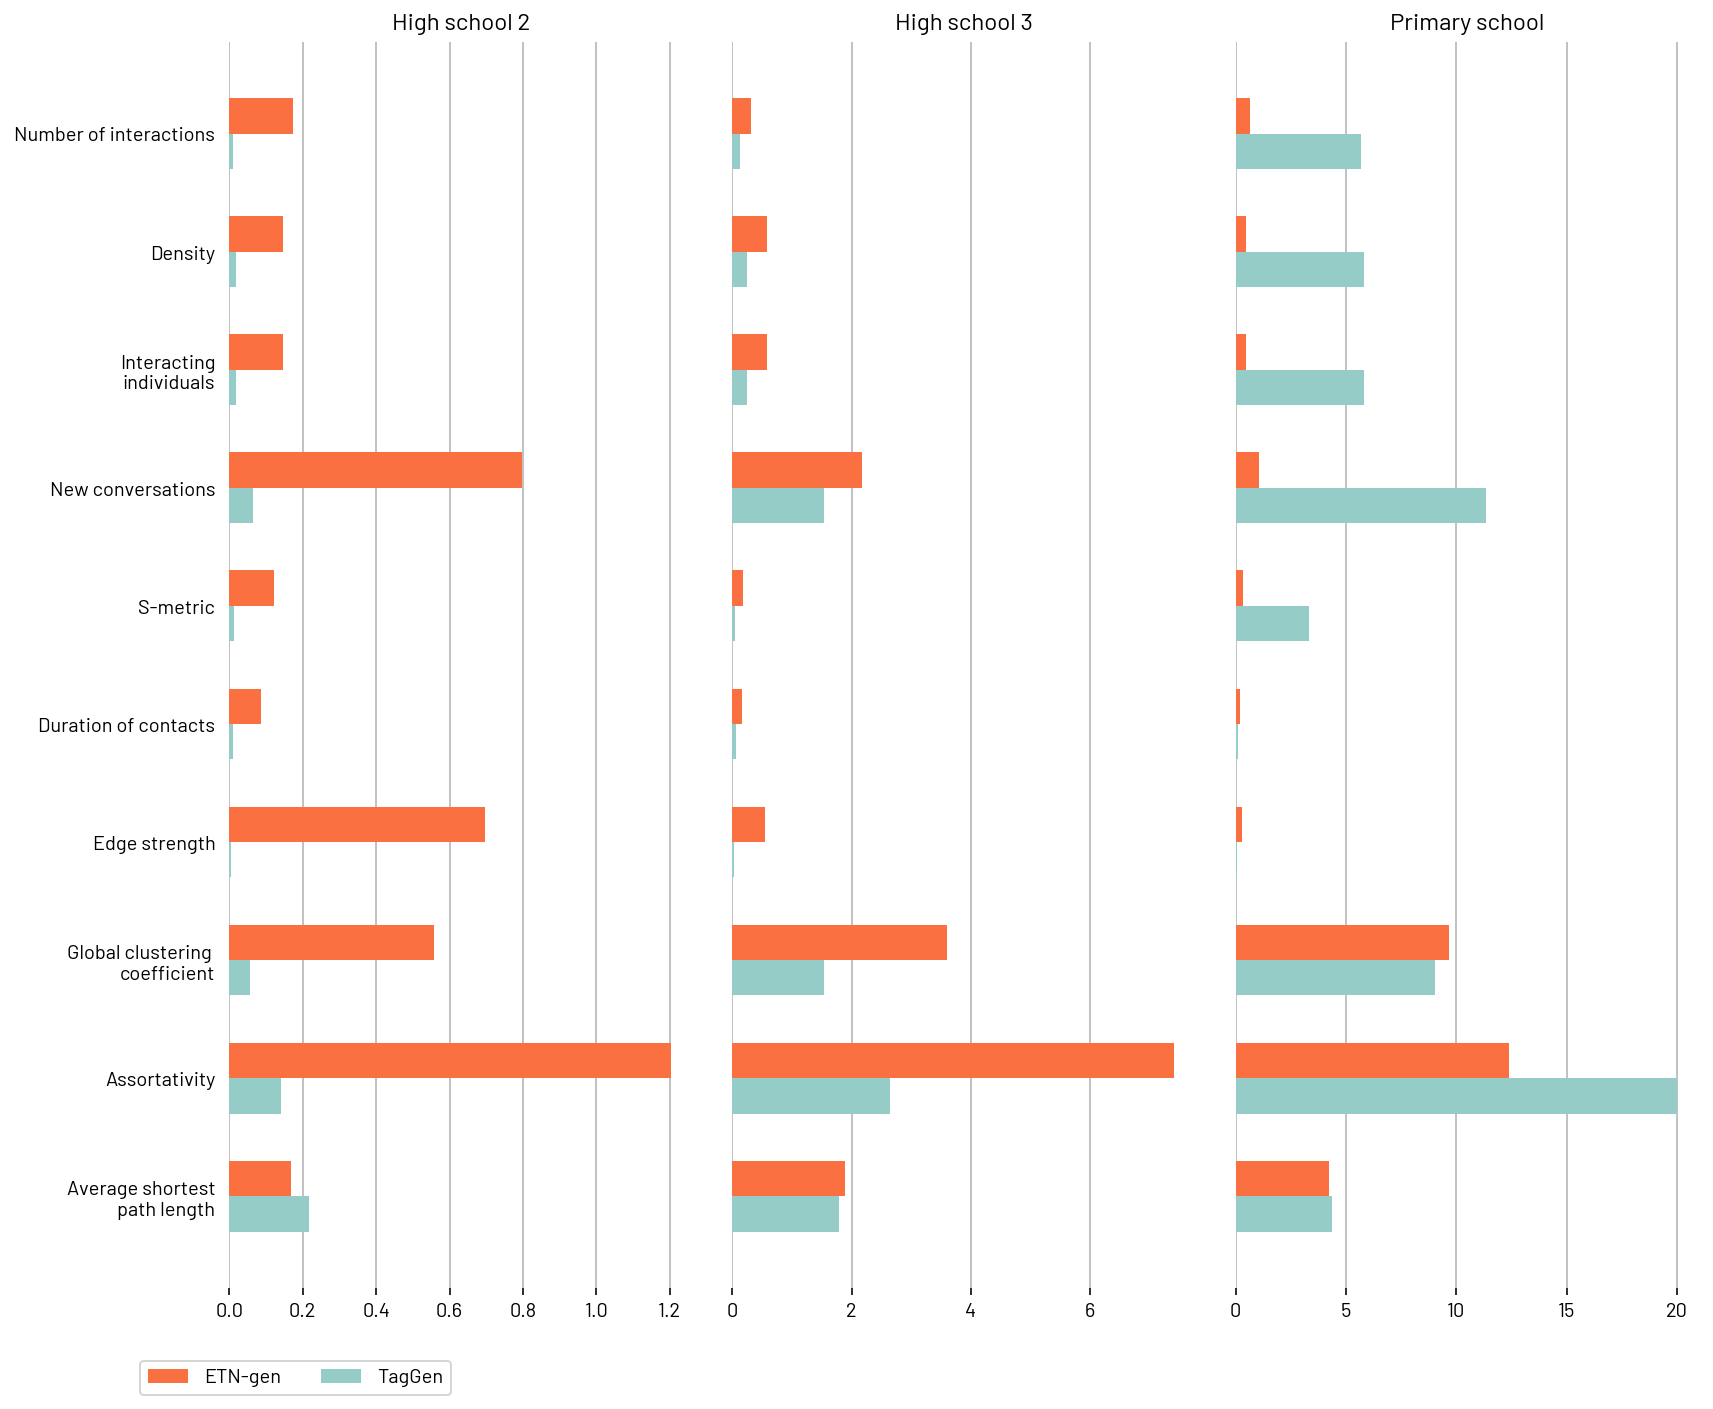

In [77]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
nb_bins = 50


x1,x2 = compute_ks_all_metrics(nb_bins,"High_School12")


x = np.arange(10)/1.5  # the label locations

width = 0.2  # the width of the bars


fig, ax = plt.subplots(1,3,figsize=(12,10))
fig.tight_layout(pad=-4)


ax[0].title.set_text("High_School13")
rects1 = ax[0].barh(x + 0.1, x1[:,0], width, label='ETN-gen',color=ETN_COLOR)
rects3 = ax[0].barh(x - 0.1, x2[:,0], width, label='TagGen',color=TAG_COLOR)



x1,x2 = compute_ks_all_metrics(nb_bins,"High_School13")
ax[1].title.set_text("High school 3")


rects1 = ax[1].barh(x + 0.1, x1[:,0], width, label='ETN-gen',color=ETN_COLOR)
rects3 = ax[1].barh(x - 0.1, x2[:,0], width, label='TagGen',color=TAG_COLOR)

x1,x2 = compute_ks_all_metrics(nb_bins,"primary_school")
ax[2].title.set_text("Primary school")
ax[0].title.set_text("High school 2")
rects1 = ax[2].barh(x + 0.1, x1[:,0], width, label='ETN-gen',color=ETN_COLOR)
rects3 = ax[2].barh(x - 0.1, x2[:,0], width, label='TagGen',color=TAG_COLOR)


ax[0].set_yticklabels(labels)
ax[0].set_yticks(x)
ax[0].set_xlim(xmin=0)

ax[1].set_yticks(x)
ax[1].set_yticklabels([" "," "," "," "," "," "," "," "," "," "],rotation=0)
ax[1].set_xlim(xmin=0)

ax[2].set_yticks(x)
ax[2].set_xlim(xmin=0)
ax[2].set_yticklabels([" "," "," "," "," "," "," "," "," "," "],rotation=0)

#ax[2].set_xticks([0,0.33,0.66,1])
#ax[2].set_xticklabels(["0.0","0.33","0.66","1.0"])
#ax[1].set_xticks([0,0.33,0.66,1])
#ax[1].set_xticklabels(["0.0","0.33","0.66","1.0"])
#ax[0].set_xticks([0,0.33,0.66,1])
#ax[0].set_xticklabels(["0.0","0.33","0.66","1.0"])


ax[0].tick_params(bottom=True, right=False,left=False)
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, color='#b3b3b3')
ax[0].yaxis.grid(False)

ax[1].tick_params(bottom=True, right=False,left=False)
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, color='#b3b3b3')
ax[1].yaxis.grid(False)

ax[2].tick_params(bottom=True, right=False,left=False)
ax[2].set_axisbelow(True)
ax[2].xaxis.grid(True, color='#b3b3b3')
ax[2].yaxis.grid(False)



ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)



ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)


ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)


ax[0].legend(loc='upper right',ncol = 5,bbox_to_anchor=(0.5, -0.05))

fig.tight_layout()
plt.savefig("topology_main_kld_test2_SI_face_to_Face.pdf", bbox_inches = 'tight')
plt.show()

In [80]:
def plot_one_line(ax,o,name):
    ax.hist(o)
    ax.set_title(name)
    

In [81]:
file_name = "High_School12"
o_in = load_topo_original(file_name)
e_in = load_topo_distributions("etngen",file_name)
t_in = load_topo_distributions("taggen",file_name)

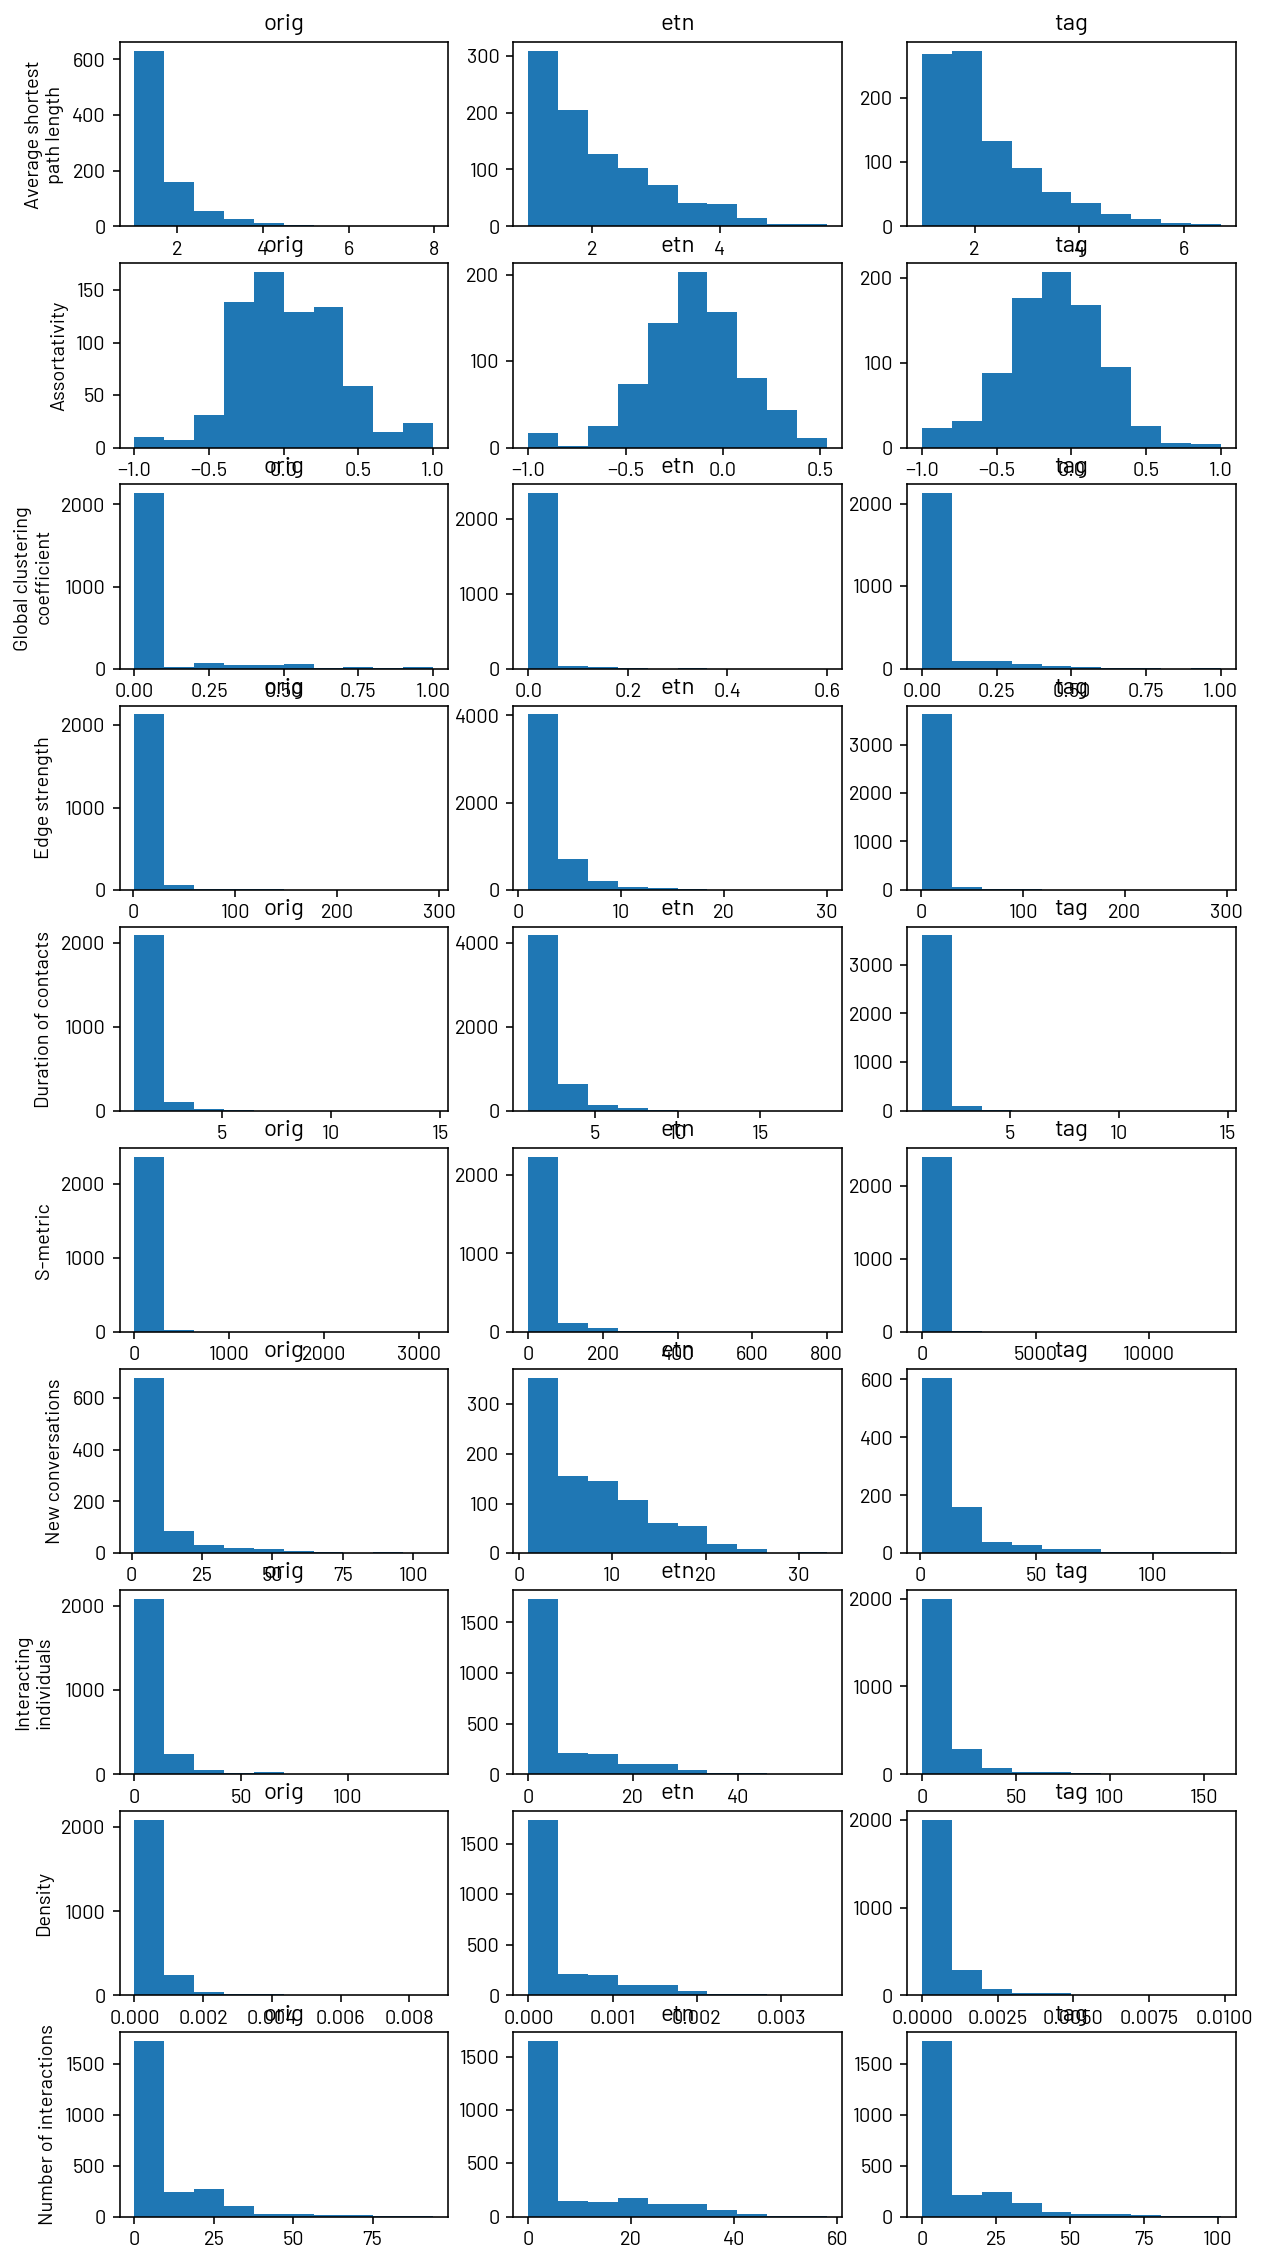

In [84]:

fig, ax = plt.subplots(10,3, figsize=(10,20))

for i in range(10):
    plot_one_line(ax[i][0],o_in[i][0],"orig")
    ax[i][0].set_ylabel(labels[i])
    plot_one_line(ax[i][1],e_in[i][0],"etn")
    plot_one_line(ax[i][2],t_in[i][0],"tag")

#fig.savefig("plot_distributions/topology_"+file_name+".pdf", bbox_inches = 'tight')

# SMS calls

<ipython-input-145-496b1e1a25eb>:4: RuntimeWarning: invalid value encountered in true_divide
  p = h/data.shape[0]
<ipython-input-156-931dde3ba59d>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(labels)


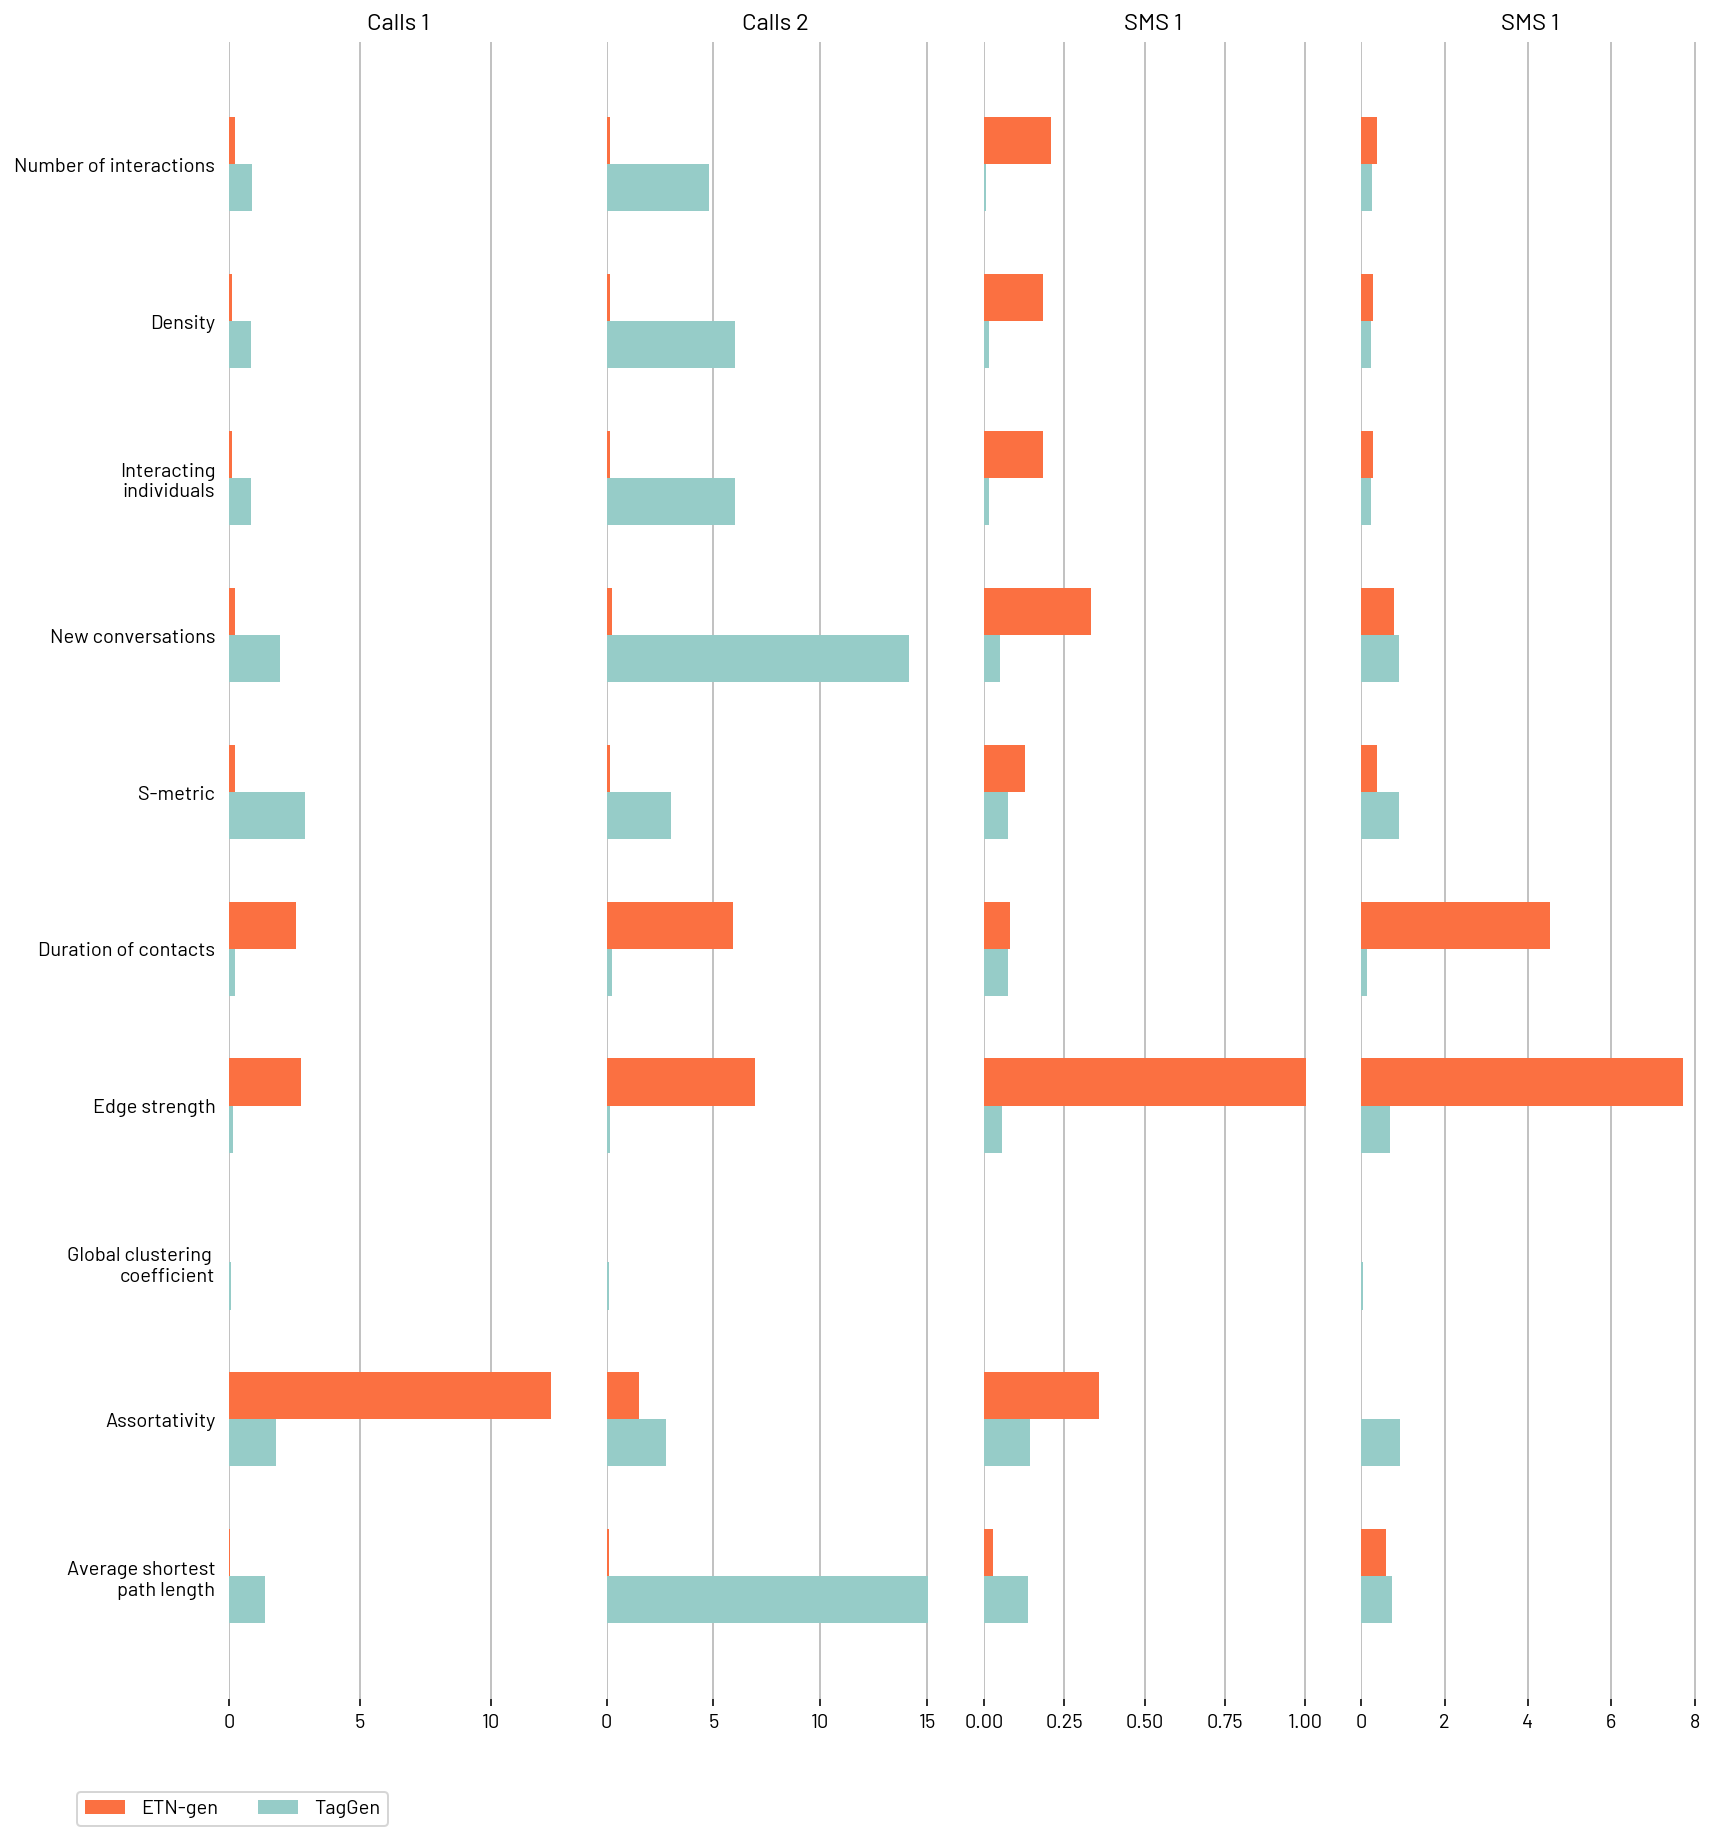

In [156]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
nb_bins = 50


x1,x2 = compute_ks_all_metrics(nb_bins,"DTU_calls_1sett")


x = np.arange(10)/1.5  # the label locations

width = 0.2  # the width of the bars


fig, ax = plt.subplots(1,4,figsize=(12,13))#12 10
fig.tight_layout(pad=-4)


ax[0].title.set_text("Calls 1")
rects1 = ax[0].barh(x + 0.1, x1[:,0], width, label='ETN-gen',color=ETN_COLOR)
rects3 = ax[0].barh(x - 0.1, x2[:,0], width, label='TagGen',color=TAG_COLOR)



x1,x2 = compute_ks_all_metrics(nb_bins,"FF_calls_1sett")
ax[1].title.set_text("Calls 2")


rects1 = ax[1].barh(x + 0.1, x1[:,0], width, label='ETN-gen',color=ETN_COLOR)
rects3 = ax[1].barh(x - 0.1, x2[:,0], width, label='TagGen',color=TAG_COLOR)

x1,x2 = compute_ks_all_metrics(nb_bins,"DTU_SMS_1sett")
ax[2].title.set_text("SMS 1")
rects1 = ax[2].barh(x + 0.1, x1[:,0], width, label='ETN-gen',color=ETN_COLOR)
rects3 = ax[2].barh(x - 0.1, x2[:,0], width, label='TagGen',color=TAG_COLOR)



x1,x2 = compute_ks_all_metrics(nb_bins,"FF_SMS_1sett")
ax[3].title.set_text("SMS 1")
rects1 = ax[3].barh(x + 0.1, x1[:,0], width, label='ETN-gen',color=ETN_COLOR)
rects3 = ax[3].barh(x - 0.1, x2[:,0], width, label='TagGen',color=TAG_COLOR)


ax[0].set_yticklabels(labels)
ax[0].set_yticks(x)
ax[0].set_xlim(xmin=0)

ax[1].set_yticks(x)
ax[1].set_yticklabels([" "," "," "," "," "," "," "," "," "," "],rotation=0)
ax[1].set_xlim(xmin=0)

ax[2].set_yticks(x)
ax[2].set_xlim(xmin=0)
ax[2].set_yticklabels([" "," "," "," "," "," "," "," "," "," "],rotation=0)

ax[3].set_yticks(x)
ax[3].set_xlim(xmin=0)
ax[3].set_yticklabels([" "," "," "," "," "," "," "," "," "," "],rotation=0)

#ax[2].set_xticks([0,0.33,0.66,1])
#ax[2].set_xticklabels(["0.0","0.33","0.66","1.0"])
#ax[1].set_xticks([0,0.33,0.66,1])
#ax[1].set_xticklabels(["0.0","0.33","0.66","1.0"])
#ax[0].set_xticks([0,0.33,0.66,1])
#ax[0].set_xticklabels(["0.0","0.33","0.66","1.0"])


ax[0].tick_params(bottom=True, right=False,left=False)
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, color='#b3b3b3')
ax[0].yaxis.grid(False)

ax[1].tick_params(bottom=True, right=False,left=False)
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, color='#b3b3b3')
ax[1].yaxis.grid(False)

ax[2].tick_params(bottom=True, right=False,left=False)
ax[2].set_axisbelow(True)
ax[2].xaxis.grid(True, color='#b3b3b3')
ax[2].yaxis.grid(False)

ax[3].tick_params(bottom=True, right=False,left=False)
ax[3].set_axisbelow(True)
ax[3].xaxis.grid(True, color='#b3b3b3')
ax[3].yaxis.grid(False)



ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)



ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)


ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)

ax[3].spines['top'].set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].spines['left'].set_visible(False)
ax[3].spines['bottom'].set_visible(False)


ax[0].legend(loc='upper right',ncol = 5,bbox_to_anchor=(0.5, -0.05))

fig.tight_layout()
plt.savefig("topology_main_kld_test2_SI_SMS_calls.pdf", bbox_inches = 'tight')
plt.show()